# K Nearest Neighbors with Python



## Import Libraries



In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Get the Data

Set index_col=0 to use the first column as the index.

In [55]:
df = pd.read_csv("prostate.csv",index_col=0)

In [56]:
df.head()

,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa
lcavol,,,,,,,,
-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783
-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519
-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519
-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519
0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564


## Standardize the Variables

Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(df.drop('svi',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaled_features = scaler.transform(df.drop('svi',axis=1))

In [61]:
scaled_features

array([[-2.01663373, -1.87210098, -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -2.53331785],
       [-0.72575947, -0.79198919, -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -2.29971238],
       [-2.20015441,  1.36823439, -1.03002898, -0.86765522,  0.34440695,
        -0.15615511, -2.29971238],
       [-0.81219129, -0.79198919, -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -2.29971238],
       [-0.46121761, -0.25193329, -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -1.83463099],
       [-0.93880639, -1.87210098, -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -1.49161747],
       [-0.3646778 ,  0.01809466,  0.35670122, -0.86765522, -1.04757113,
        -0.86895727, -1.49161747],
       [-0.20984102, -0.79198919,  0.99529051, -0.86765522, -1.04757113,
        -0.86895727, -1.4141616 ],
       [-0.20984102, -2.2771429 , -1.03002898, -0.86765522, -1.04757113,
        -0.86895727, -1.24618021],
       [-0.90192675, -0.1169

In [62]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,lweight,age,lbph,svi,lcp,gleason,pgg45
0,-2.016634,-1.872101,-1.030029,-0.867655,-1.047571,-0.868957,-2.533318
1,-0.725759,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
2,-2.200154,1.368234,-1.030029,-0.867655,0.344407,-0.156155,-2.299712
3,-0.812191,-0.791989,-1.030029,-0.867655,-1.047571,-0.868957,-2.299712
4,-0.461218,-0.251933,-1.030029,-0.867655,-1.047571,-0.868957,-1.834631


## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['svi'],
                                                    test_size=0.30)

## Using KNN

start with k=1.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn = KNeighborsClassifier(n_neighbors=1)

In [67]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [69]:
pred = knn.predict(X_test)

## Predictions and Evaluations

KNN model!

In [70]:
from sklearn.metrics import classification_report,confusion_matrix

In [71]:
print(confusion_matrix(y_test,pred))

[[19  3]
 [ 5  3]]


In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.50      0.38      0.43         8

    accuracy                           0.73        30
   macro avg       0.65      0.62      0.63        30
weighted avg       0.71      0.73      0.72        30



## Choosing a K Value

using the elbow method to pick a good K Value:

In [73]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

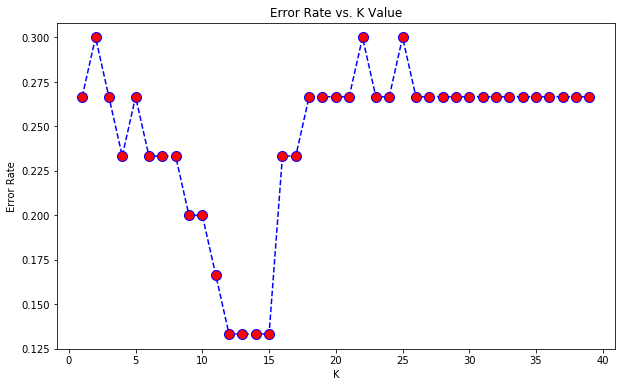

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [75]:
# A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[19  3]
 [ 5  3]]


              precision    recall  f1-score   support

           0       0.79      0.86      0.83        22
           1       0.50      0.38      0.43         8

    accuracy                           0.73        30
   macro avg       0.65      0.62      0.63        30
weighted avg       0.71      0.73      0.72        30



In [76]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[21  1]
 [ 7  1]]


              precision    recall  f1-score   support

           0       0.75      0.95      0.84        22
           1       0.50      0.12      0.20         8

    accuracy                           0.73        30
   macro avg       0.62      0.54      0.52        30
weighted avg       0.68      0.73      0.67        30

